<a href="https://colab.research.google.com/github/Ahnjihye/KOFAC-AI-book/blob/main/K_means_%EC%BD%94%EB%93%9C%EB%A1%9C_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0(%EA%B0%80%EB%B0%A9%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오기

**데이터 불러오는 방법 2가지 중 택1 하여 진행**

1.   깃허브에서 바로 데이터 복사하기

```
import pandas as pd

! git clone https://github.com/Ahnjihye/KOFAC-AI-book.git

data = pd.read_csv("KOFAC-AI-book/bag.csv", encoding ='cp949') #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기
```

2.   PC에 저장된 파일을 업로드하기

```
import pandas as pd
from google.colab import files
uploaded = files.upload()                             #파일 업로드

data = pd.read_csv("bag.csv", encoding = 'cp949') #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기
```




In [2]:
import pandas as pd

! git clone https://github.com/Ahnjihye/KOFAC-AI-book.git

data = pd.read_csv("KOFAC-AI-book/bag.csv", encoding ='cp949') #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기

Cloning into 'KOFAC-AI-book'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


,가방 가로길이,가방 세로길이
0,10,18
1,26,16
2,8,8
3,28,13
4,31,38
5,35,36
6,22,35
7,18,10
8,15,34
9,7,12


## 2. 데이터를 산점도로 나타내기

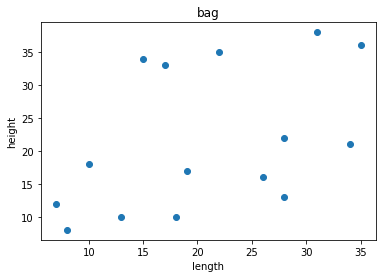

In [3]:
import matplotlib.pyplot as plt       # 그래프 시각화 라이브러리

plt.scatter(data['가방 가로길이'],data['가방 세로길이']) 
plt.xlabel('length') 		      # x축 이름 설정하기
plt.ylabel('height')              # y축 이름 설정하기
plt.title('bag')                  # 그래프 제목 설정하기
plt.show()                        # 그래프 출력하기

## 3. K-means 모델 만들고 학습시키기

In [4]:
from sklearn.cluster import KMeans    # KMeans 기능 포함시키기

# K-means 모델 생성
model = KMeans(n_clusters = 3)        # 나눌 그룹 개수(k) = 3

# 가방 데이터 15개로 K-means 학습
labels= model.fit_predict(data)   

# K-means 학습 결과가 저장된 변수 labels 확인
print(labels)                    

# 그룹 세 개의 각 중심점 x좌표, y좌표를 center에 저장하고 확인
center = pd.DataFrame(model.cluster_centers_, columns=['x','y']) 
center                      

[0 2 0 2 1 1 1 0 1 0 2 1 0 2 0]


,x,y
0,12.5,12.5
1,24.0,35.2
2,29.0,18.0


## 4. K-means 분류 결과 그래프로 확인하기

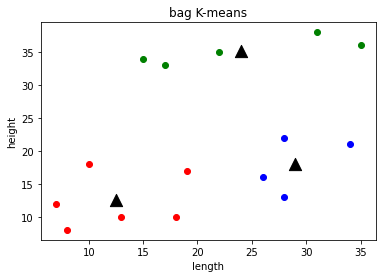

In [25]:
# 1. 가방 데이터 그룹별로 색상을 구분하여 산점도로 나타내기
# 그룹0은 빨강, 그룹1은 초록, 그룹2는 파랑색 점으로 표시
for i in range(len(labels)):
    if labels[i]==0:
        plt.scatter(data['가방 가로길이'][i],data['가방 세로길이'][i], c='r')
    elif labels[i]==1:
        plt.scatter(data['가방 가로길이'][i],data['가방 세로길이'][i], c='g')
    elif labels[i]==2:
        plt.scatter(data['가방 가로길이'][i],data['가방 세로길이'][i], c='b')

# 2. 각 그룹의 중심점을 삼각형으로 산점도 위에 나타내기
plt.scatter(center['x'],center['y'], marker='^', c = 'black', s=150)
plt.xlabel('length') 		      # x축 이름 설정하기
plt.ylabel('height')              # y축 이름 설정하기
plt.title('bag K-means')          # 그래프 제목 설정하기
plt.show()


## 5. 새로운 데이터의 K-means 그룹 예측해보기

In [20]:
new_data = [[20, 25]]           # 새로운 데이터

# 새로운 데이터의 예측 결과를 변수 new_group에 저장
new_group = model.predict(new_data)    
print(new_group)

[1]


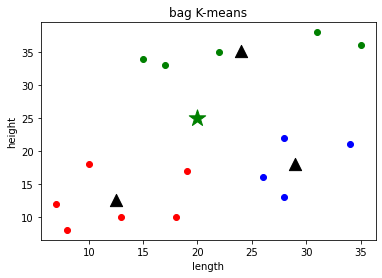

In [24]:
# 산점도에 새로운 데이터 같이 보여주기

# K-means 분류 결과 그래프로 확인하기
# 1. 가방 데이터 그룹별로 산점도로 나타내기
for i in range(len(labels)):
    if labels[i]==0:
        plt.scatter(data['가방 가로길이'][i],data['가방 세로길이'][i], c='r')
    elif labels[i]==1:
        plt.scatter(data['가방 가로길이'][i],data['가방 세로길이'][i], c='g')
    elif labels[i]==2:
        plt.scatter(data['가방 가로길이'][i],data['가방 세로길이'][i], c='b')

# 2. 각 그룹의 중심점 별모양으로 산점도 위에 나타내기
plt.scatter(center['x'],center['y'], marker='^', c = 'black', s=150)
plt.xlabel('length') 		      # x축 이름 설정하기
plt.ylabel('height')              # y축 이름 설정하기
plt.title('bag K-means')          # 그래프 제목 설정하기

# 3. 새로운 데이터 산점도에 나타내기 
# 그룹 배정 결과에 따라 알맞은 색상으로 표현
if new_group == 0 :
    plt.scatter(new_data[0][0], new_data[0][1], marker='*', c = 'r', s=300)
elif new_group == 1 :
    plt.scatter(new_data[0][0], new_data[0][1], marker='*', c = 'g', s=300)
elif new_group == 2 :
    plt.scatter(new_data[0][0], new_data[0][1], marker='*', c = 'b', s=300)

plt.xlabel('length') 		      # x축 이름 설정하기
plt.ylabel('height')              # y축 이름 설정하기
plt.title('bag K-means')          # 그래프 제목 설정하기
plt.show()